In [1]:
import pandas as pd
import numpy as np

In [2]:
sales=pd.read_csv("C:\\Users\\LENOVO\Downloads\\Sales_Outliers.csv")

In [3]:
sales.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
sales["Item_Weight"].fillna(sales["Item_Weight"].mean(),inplace=True)
sales.isnull().sum()
sales=sales.iloc[:,1:]
sales.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# OUTLIERS
z-score is calculated to find out "outliers"
#z-score =(x-xbar(mean))/std
#outliers are basically extreme values in data
sales.info()

In [7]:
#detecting outliers function

def detect_outliers(data):
    outlier=[]
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier 

In [8]:
print(np.mean(sales["Item_Outlet_Sales"]))
np.median(sales["Item_Outlet_Sales"])

2181.2889135750365


1794.331

In [9]:
detect_outliers(sales["Item_Outlet_Sales"])

[7968.2944,
 7370.406,
 7452.9652,
 7696.648,
 9267.936,
 7763.228,
 9158.079,
 8114.7704,
 7443.644,
 7488.9184,
 7833.8028,
 7759.899,
 7370.406,
 9133.4444,
 9275.9256,
 10236.675,
 7472.2734,
 8132.0812,
 11445.102,
 7646.0472,
 7504.2318,
 8239.9408,
 9371.8008,
 8851.1452,
 7478.2656,
 8604.7992,
 7590.12,
 8760.5964,
 7931.6754,
 7534.1928,
 7843.124,
 9467.676,
 8912.3988,
 7503.566,
 8138.7392,
 7334.4528,
 7350.432,
 8063.5038,
 7580.133000000002,
 8958.339,
 9779.9362,
 9251.9568,
 10993.6896,
 7741.9224,
 8262.578000000001,
 8413.0488,
 10256.649,
 9664.7528,
 8508.924,
 8028.8822,
 7646.0472,
 8388.4142,
 12117.56,
 7685.9952,
 9562.2196,
 7602.1044,
 8868.456,
 8479.6288,
 7425.0016,
 7317.142,
 8474.3024,
 7393.0432,
 8217.3036,
 7883.071999999999,
 9069.5276,
 8789.8916,
 10306.584,
 9554.23,
 8217.3036,
 7719.2852,
 8062.838000000002,
 8245.2672,
 13086.9648,
 10072.8882,
 7939.665,
 8323.8316,
 7873.085,
 8209.314,
 7322.4684,
 7717.9536,
 7433.656999999998,
 7943.659

In [10]:
np.min(detect_outliers(sales["Item_Outlet_Sales"]))

7317.142

Text(0.5, 1.0, 'Item Outlet Sales')

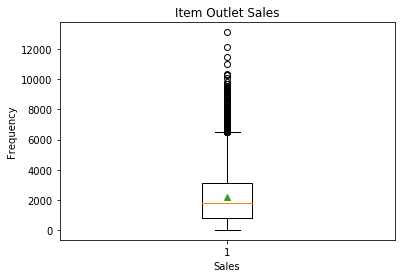

In [13]:
import matplotlib.pyplot as plt
plt.boxplot(sales["Item_Outlet_Sales"],showmeans=True)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Item Outlet Sales")
#orage line: median
#green traingle: mean
#circle: pure outliers
#lowest dash/line:min value
#highest dash /line:max value
#around 7000 outliers starts=>>denoted by dark line
#outlier near max value i.e dark line is good outliers 

# STANDARDIZATION
#process of rescaling one or attribute so that mean is 0 and standard deviation is 1
#it usually assumes that ur data has Gaussian (bell air) curve
#it comes into picture when input have large difference between their ranges or when measured in different measurement units


In [8]:
sales.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [1]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()

In [10]:
#IN STANDARDIZATION SYNTAX "[[]]" IS USED 
sales["Item_Weight"]=scaling.fit_transform(sales[["Item_Weight"]])#!include double square bracket!

In [16]:
sales["Item_Visibility"]=scaling.fit_transform(sales[["Item_Visibility"]])
sales["Outlet_Establishment_Year"]=scaling.fit_transform(sales[["Outlet_Establishment_Year"]])
sales["Item_MRP"]=scaling.fit_transform(sales[["Item_MRP"]])
sales["Item_Outlet_Sales"]=scaling.fit_transform(sales[["Item_Outlet_Sales"]])

In [17]:
sales.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-8.418717e-01,Low Fat,0.048866,Dairy,0.927507,OUT049,0.583333,Medium,Tier 1,Supermarket Type1,0.283587
1,-1.641706e+00,Regular,0.058705,Soft Drinks,0.072068,OUT018,1.000000,Medium,Tier 3,Supermarket Type2,0.031419
2,1.098554e+00,Low Fat,0.051037,Meat,0.468288,OUT049,0.583333,Medium,Tier 1,Supermarket Type1,0.158115
3,1.500838e+00,Regular,0.000000,Fruits and Vegetables,0.640093,OUT010,0.541667,Medium,Tier 3,Grocery Store,0.053555
4,-9.294275e-01,Low Fat,0.000000,Household,0.095805,OUT013,0.083333,High,Tier 3,Supermarket Type1,0.073651
5,-5.827538e-01,Regular,0.000000,Baking Goods,0.085361,OUT018,1.000000,Medium,Tier 3,Supermarket Type2,0.040090
6,1.875007e-01,Regular,0.038799,Snack Foods,0.111923,OUT013,0.083333,High,Tier 3,Supermarket Type1,0.023768
7,4.035383e-14,Low Fat,0.388165,Snack Foods,0.324587,OUT027,0.000000,Medium,Tier 3,Supermarket Type3,0.305621
8,7.909259e-01,Regular,0.050815,Frozen Foods,0.278791,OUT045,0.708333,Medium,Tier 2,Supermarket Type1,0.079925
9,1.500838e+00,Regular,0.287613,Frozen Foods,0.664399,OUT017,0.916667,Medium,Tier 2,Supermarket Type1,0.358309


# NORMALIZATION
#used mostly when different measurement unit is in picture
rescaling one or attribute so that mean is 0 and standard deviation is 1

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
abc=scaling.fit_transform(sales[["Item_Weight"]])#!include double square bracket!
abc

array([[0.28252456],
       [0.08127419],
       [0.77076511],
       ...,
       [0.35992855],
       [0.15808276],
       [0.61000298]])

In [18]:
sales["Item_Visibility"]=scaling.fit_transform(sales[["Item_Visibility"]])
sales["Outlet_Establishment_Year"]=scaling.fit_transform(sales[["Outlet_Establishment_Year"]])
sales["Item_MRP"]=scaling.fit_transform(sales[["Item_MRP"]])
sales["Item_Outlet_Sales"]=scaling.fit_transform(sales[["Item_Outlet_Sales"]])

In [19]:
sales.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-8.418717e-01,Low Fat,0.048866,Dairy,0.927507,OUT049,0.583333,Medium,Tier 1,Supermarket Type1,0.283587
1,-1.641706e+00,Regular,0.058705,Soft Drinks,0.072068,OUT018,1.000000,Medium,Tier 3,Supermarket Type2,0.031419
2,1.098554e+00,Low Fat,0.051037,Meat,0.468288,OUT049,0.583333,Medium,Tier 1,Supermarket Type1,0.158115
3,1.500838e+00,Regular,0.000000,Fruits and Vegetables,0.640093,OUT010,0.541667,Medium,Tier 3,Grocery Store,0.053555
4,-9.294275e-01,Low Fat,0.000000,Household,0.095805,OUT013,0.083333,High,Tier 3,Supermarket Type1,0.073651
5,-5.827538e-01,Regular,0.000000,Baking Goods,0.085361,OUT018,1.000000,Medium,Tier 3,Supermarket Type2,0.040090
6,1.875007e-01,Regular,0.038799,Snack Foods,0.111923,OUT013,0.083333,High,Tier 3,Supermarket Type1,0.023768
7,4.035383e-14,Low Fat,0.388165,Snack Foods,0.324587,OUT027,0.000000,Medium,Tier 3,Supermarket Type3,0.305621
8,7.909259e-01,Regular,0.050815,Frozen Foods,0.278791,OUT045,0.708333,Medium,Tier 2,Supermarket Type1,0.079925
9,1.500838e+00,Regular,0.287613,Frozen Foods,0.664399,OUT017,0.916667,Medium,Tier 2,Supermarket Type1,0.358309
